In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
CO2 emissions (metric tons per capita)    232 non-null float64
GDP per capita (current US$)              228 non-null float64
CountryName                               232 non-null object
dtypes: float64(2), object(1)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 5 columns):
0    228 non-null float64
1    228 non-null float64
2    228 non-null object
3    228 non-null float64
4    228 non-null float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


Text(0, 0.5, 'WCSS')

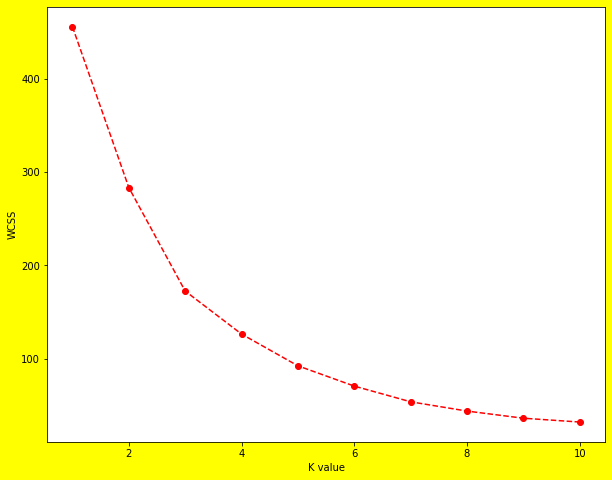

In [6]:
""" ----------- K-Means ---------------- """
"""
1. Add columns with standardized variables which have a mean of 0 and a variance of 1
2. Plot the elbow curve for these normalised variables to determine how many clusters to use
3. Create k-means clusters
4. Plot the k-means clusters
5. Calculate average GDP, average co2 and number of countries by cluster
"""

# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel("/home/gbhure/Downloads/Cluster_Problem_Dataset.xlsx")
data.head()

data.describe()
data.info()

# replacing the NaN value
data.dropna(inplace= True)
X = data.iloc[: , :2].values
X

# feature scalling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X
X = pd.DataFrame(X , columns = ["co2" , "GDP"])

# adding Standard scalar column to DataFrame
data = pd.concat([data , X] ,axis=1 , ignore_index= True)
data.head()
data.info()

# fetching few columns from DataFrame
df = data.iloc[: , [3,4]].values
df

# Elbow method to know the Cluster value
from sklearn.cluster import KMeans
wssc = []
for i in range(1 , 11):
    km = KMeans(n_clusters= i , init= "k-means++" , n_init = 10 , max_iter= 300 , random_state= 0)
    km.fit(df)
    wssc.append(km.inertia_)
plt.figure(figsize=(10, 8) , facecolor= "yellow" , edgecolor= "blue")
plt.plot(range(1 , 11) , wssc , c = "red" , marker = "o" , ls = "--")
plt.xlabel("K value")
plt.ylabel("WCSS")
# plt.show() # from plot n_cluster = 3

In [4]:
# K-Means Cluster
km = KMeans(n_clusters= 3 , init = "k-means++" , n_init= 10 , max_iter= 300 , random_state= 0)
y_pred = km.fit_predict(df)
y_pred
data["cluster"] = y_pred

# grouping as per the cluster group
g = data.groupby("cluster")
c0 = g.get_group(0)
c1 = g.get_group(1)
c2 = g.get_group(2)
km.cluster_centers_

array([[-0.27610409, -0.39170534],
       [ 0.18974757,  1.7665304 ],
       [ 2.88944351, -0.17889189]])

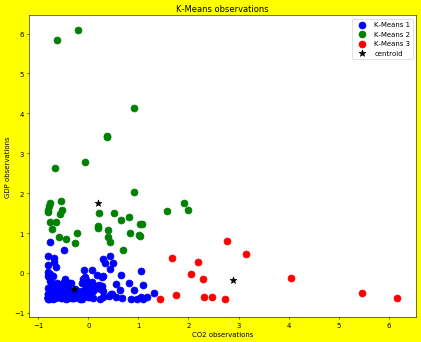

In [5]:
plt.figure(figsize=(10 , 8) , dpi = 50 , facecolor= "yellow" , edgecolor= "blue")
plt.title("K-Means observations")
plt.scatter(c0.iloc[: , 3].values , c0.iloc[: , 4].values ,s = 100, c = "blue" , label = "K-Means 1")
plt.scatter(c1.iloc[: , 3].values , c1.iloc[: , 4].values , s = 100,c = "green" , label = "K-Means 2")
plt.scatter(c2.iloc[: , 3].values , c2.iloc[: , 4].values , s = 100,c = "red" , label = "K-Means 3")
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[: , 1] , s = 100 , marker= "*" , c = "black" , label = "centroid")
plt.xlabel("CO2 observations")
plt.ylabel("GDP observations")
plt.legend()
plt.show()

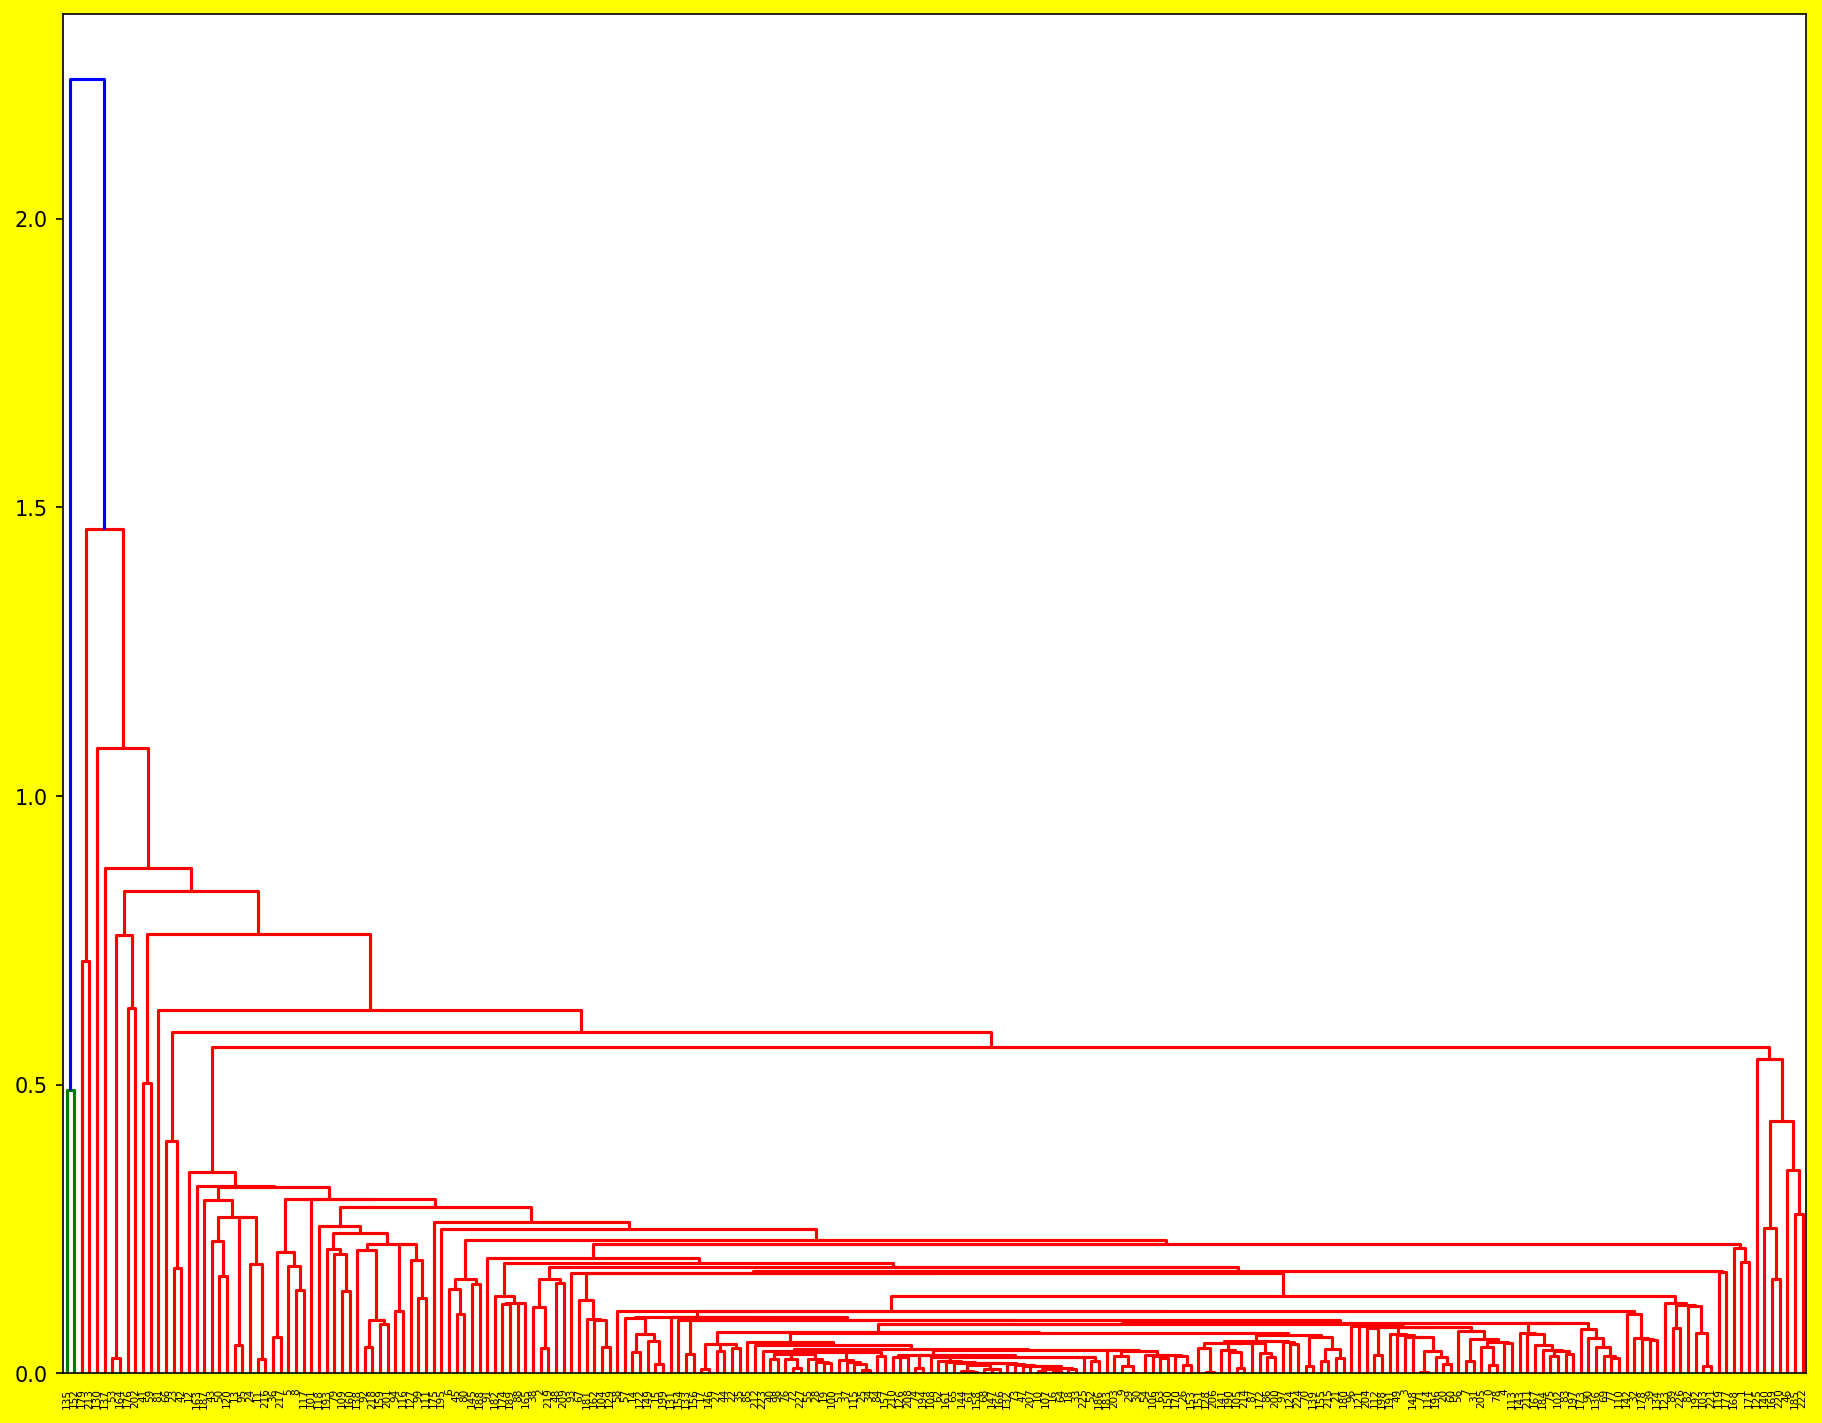

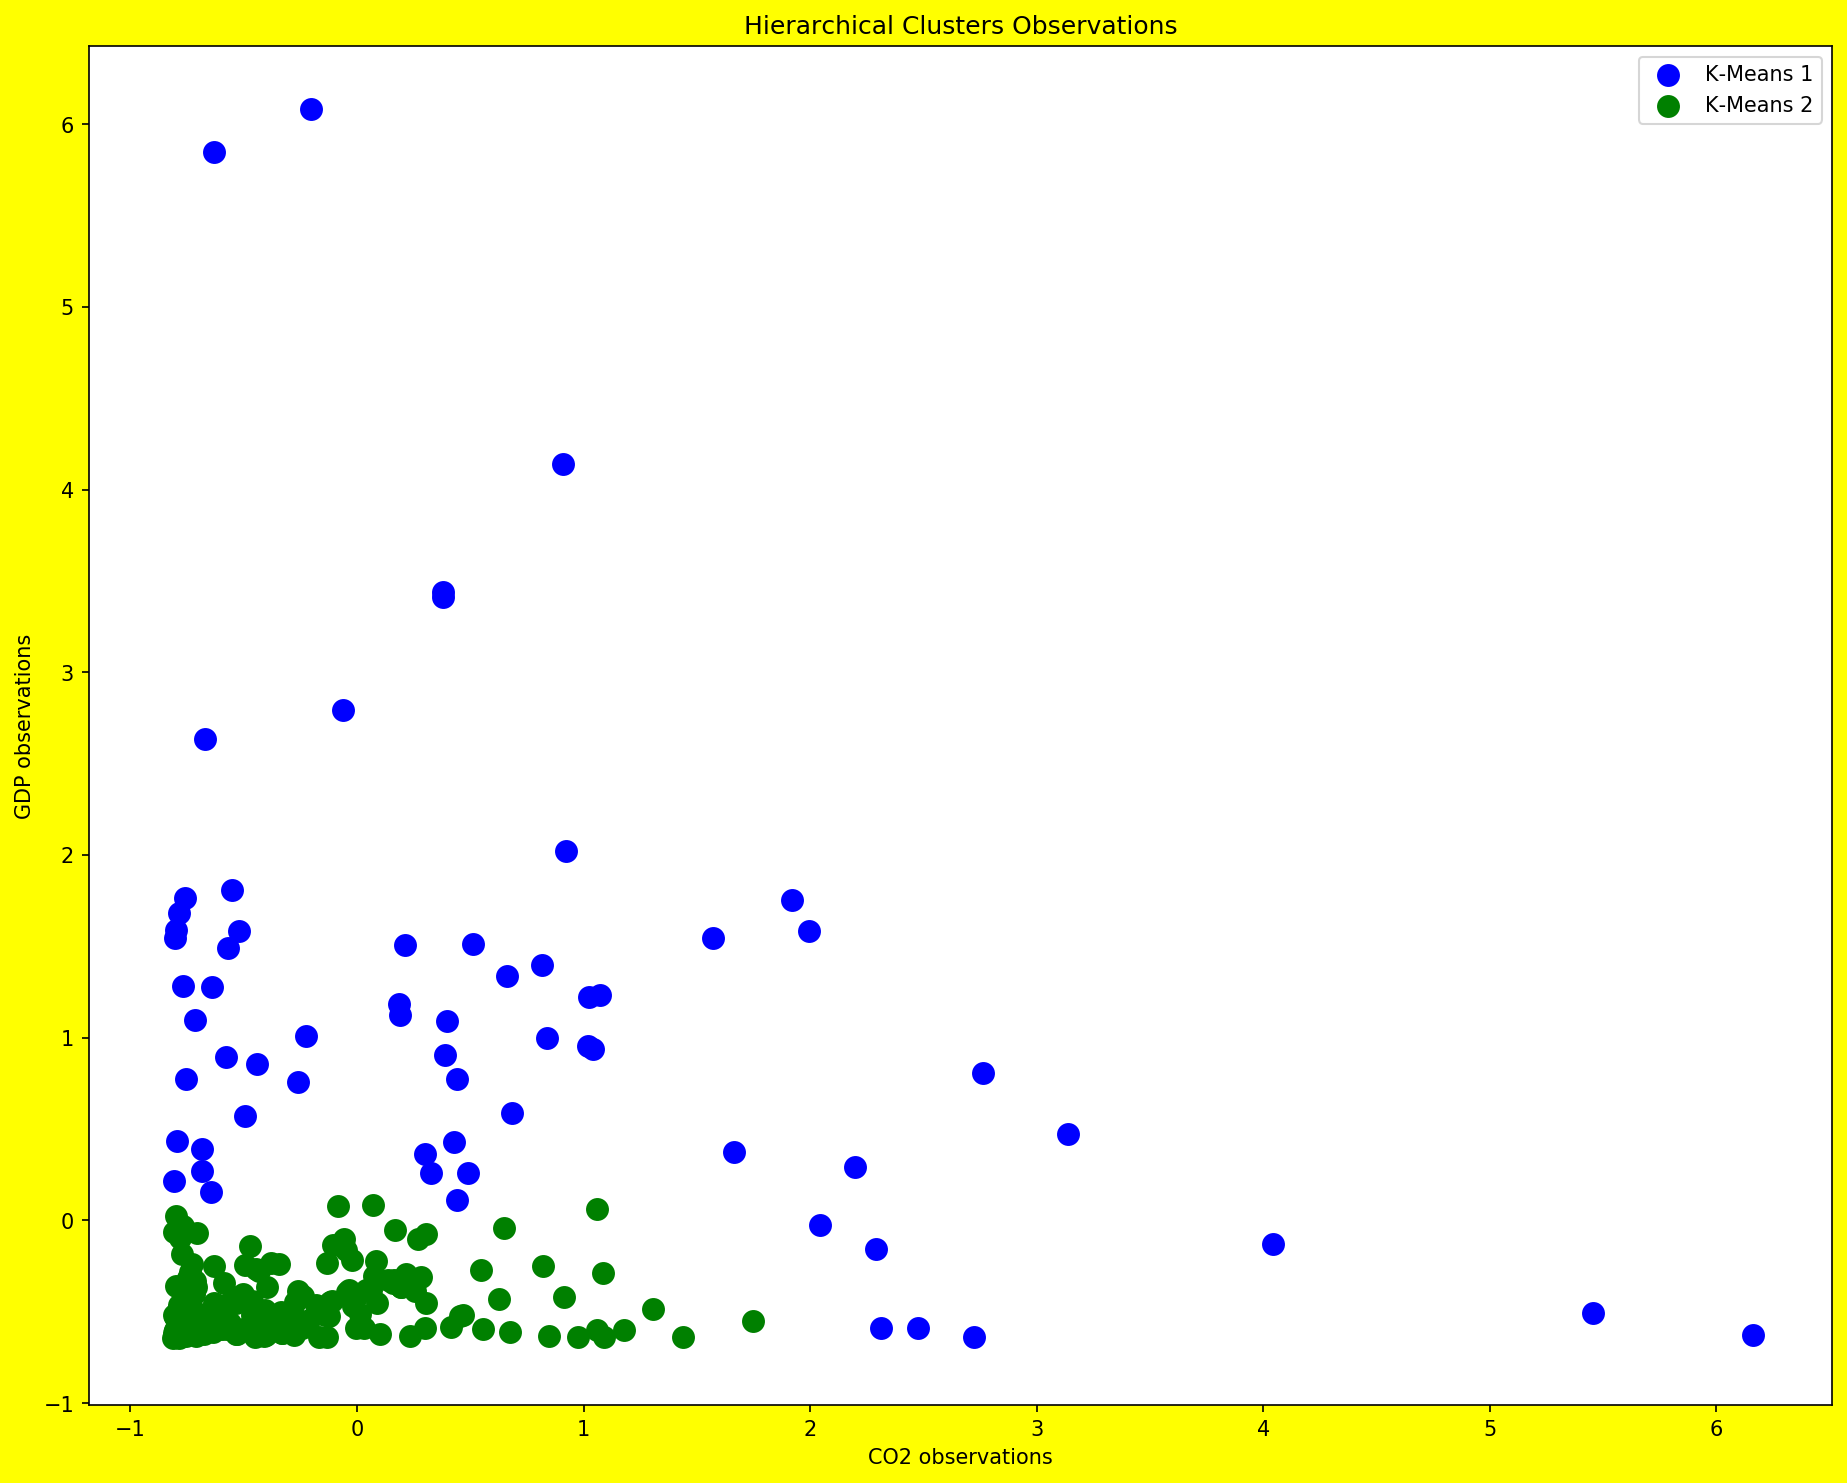

In [11]:
# Dendrogram
from scipy.cluster import hierarchy
dendro = hierarchy.linkage(X)
plt.figure(figsize=(15 , 12) , dpi = 150 , facecolor= "yellow" , edgecolor= "blue")

hierarchy.dendrogram(dendro)
plt.show() # as per observation cluster = 2

# hierarchical clusters
from sklearn.cluster import AgglomerativeClustering
cls = AgglomerativeClustering(n_clusters=2 , affinity= "euclidean" , linkage= "ward")
y_pred = cls.fit_predict(df)

data["cluster"] = y_pred

# grouping as per the cluster group
g = data.groupby("cluster")
c0 = g.get_group(0)
c1 = g.get_group(1)

# visualising

plt.figure(figsize=(15 , 12) , dpi = 150 , facecolor= "yellow" , edgecolor= "blue")
plt.title("Hierarchical Clusters Observations")
plt.scatter(c0.iloc[: , 3].values , c0.iloc[: , 4].values ,s = 100, c = "blue" , label = "K-Means 1")
plt.scatter(c1.iloc[: , 3].values , c1.iloc[: , 4].values , s = 100,c = "green" , label = "K-Means 2")
plt.xlabel("CO2 observations")
plt.ylabel("GDP observations")
plt.legend()
plt.show()


In [14]:
df = pd.read_csv('/home/gbhure/Data/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
data = [[2.1], [5], [14]]
regressor.predict(data)

array([ 45887.61812012,  73261.30521404, 158214.12722967])

In [17]:
!pwd

/home/gbhure/Downloads/Day1-2


In [20]:
import pickle
m = pickle.load(open('/home/gbhure/Apr20/model.pkl', 'rb'))
print(m.predict([[7]]))

[92139.7101064]


In [ ]:
Unsupervised Machine Learning
- Clustering
- Association -- Market Basket Analysis

Walmart -- wants to pitch mode products to customer base.. Increase revenue

Started minind data about frequenty bought items by customers

Market basket analysis -- technique to uncover association between the items. 

Association rule mining

Invoices --- 
if person by item A.. mostly they buy item B

  A    ---------->   B
Antecendent    Consequent

Rules

Apriori Algorithm
---

Support -- Freq(A,B) / N -- how frequent are itemsets (antecedent and consequent) bought together


total transaction = 100 (100 invoices)
Bread in 20 transactions
Support {bread} = 20/100 = 20%

10/100

Confidence (predictability) -- Freq(A,B) / Freq(A) -- given a purchase of antecedent, how likely is a purchase of consequent
if 9 transactions out of 20, has butter
Confidence {butter} = 9/20 = 45% confidence

Lift (interest) = Support / Sup(A)xSup(B) -- how much more likely is this association than we would expect


In [ ]:
- What discounts on what products
- to maintain the inventory stock
- TO UNDERSTAND THE CUSTOMER BEHAVIOUR

In [22]:
# ! pip install mlxtend

# from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
T1    A,B,C 
T2    D,B
T3    A,C
T4    B,C,D,E
T5    A,B

S{B} = 4/5 = 0.8 = 80%
S{A,B} = 2/5 = 40%

C(antecedent --> consequent)
= no. of transaction witth Antecedent and consequent / no of transactions with antecedent
= S (Ante, conse) / S(Ante)

C(B)--> C = 2/4 = 50%
C(D,B) --> C = 1/2 = 50%

L(ante-->conse) = S (Ante, conse) / (S(conse)*S(Ante))
L(B-->C) = 5/6